In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import warnings

# Suppressing warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
df = pd.read_csv(r'C:\Users\NIMMAGADDA SUNIL\Desktop\TechnoHach 2\Tweets.csv')

In [5]:
# Display the first few rows of the dataset
print("First 5 Rows of the Dataset:")
df.head()

First 5 Rows of the Dataset:


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
# Summary statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [7]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

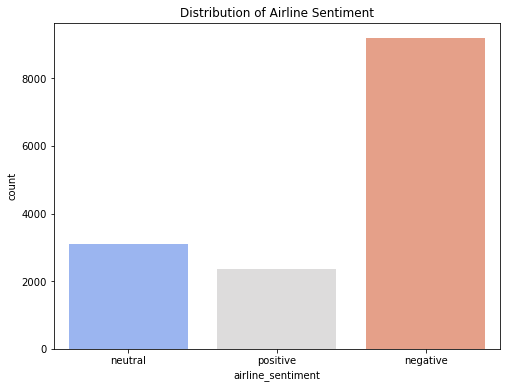

In [8]:
# Distribution of airline sentiment
plt.figure(figsize=(8,6))
sns.countplot(x= "airline_sentiment", data=df, palette= "coolwarm")
plt.title("Distribution of Airline Sentiment")
plt.show()

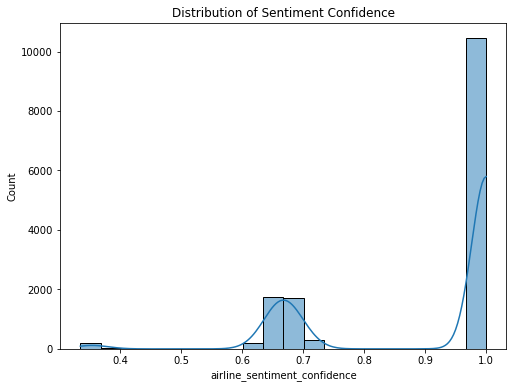

In [9]:
# Distribution of Sentiment Confidence
plt.figure(figsize=(8, 6))
sns.histplot(x='airline_sentiment_confidence', data=df, bins=20, kde=True)
plt.title('Distribution of Sentiment Confidence')
plt.show()

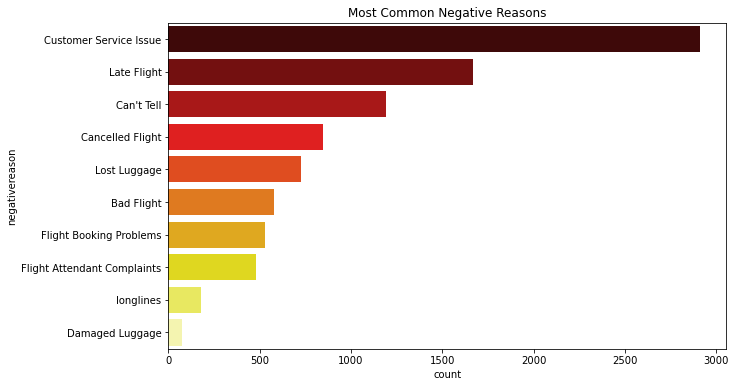

In [10]:
# Most Common Negative Reasons
plt.figure(figsize=(10, 6))
sns.countplot(y='negativereason', data=df, order=df['negativereason'].value_counts().index, palette="hot")
plt.title('Most Common Negative Reasons')
plt.show()

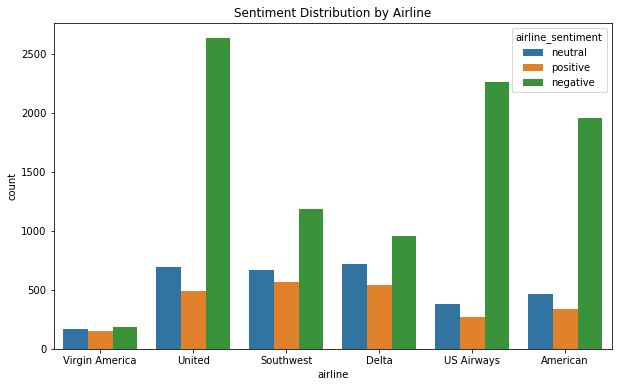

In [11]:
# Sentiment Distribution by Airline
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=df)
plt.title('Sentiment Distribution by Airline')
plt.show()

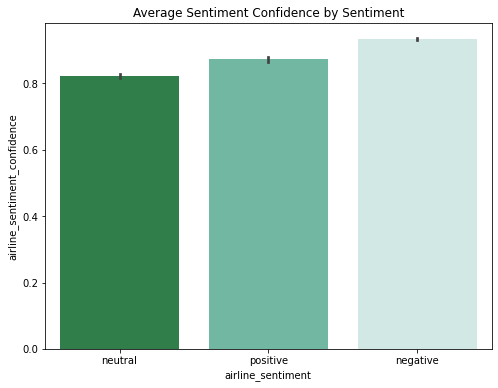

In [12]:
# Average Sentiment Confidence by Sentiment Label
plt.figure(figsize=(8,6))
sns.barplot(x = 'airline_sentiment', y = "airline_sentiment_confidence", data=df, palette='BuGn_r')
plt.title("Average Sentiment Confidence by Sentiment")
plt.show()

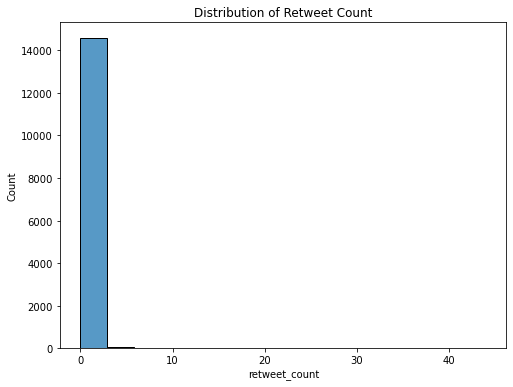

In [13]:
# Distribution of Retweet Count
plt.figure(figsize=(8,6))
sns.histplot(x = "retweet_count", data=df)
plt.title("Distribution of Retweet Count")
plt.show()

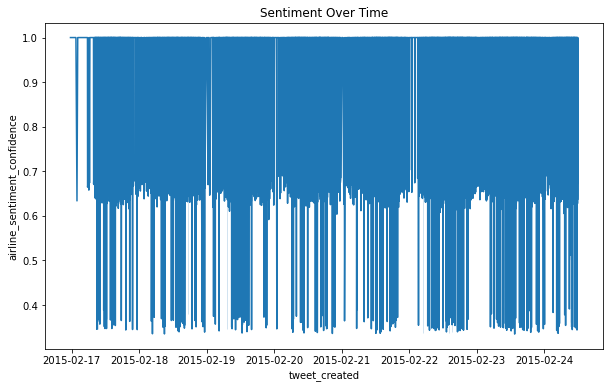

In [27]:
# Sentiment Over Time
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
plt.figure(figsize=(10, 6))
sns.lineplot(x='tweet_created', y='airline_sentiment_confidence', data=df)
plt.title('Sentiment Over Time')
plt.show()

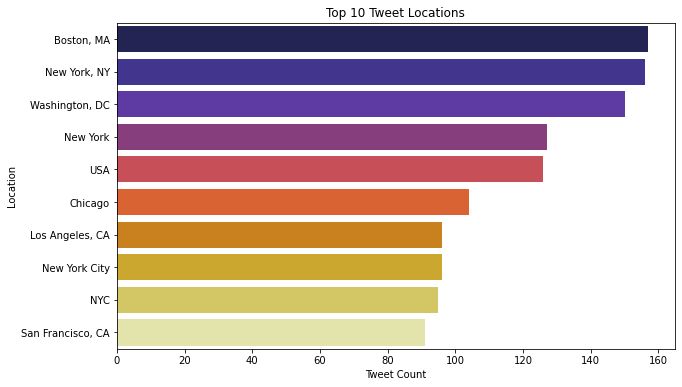

In [20]:
# Top 10 Tweet Locations
plt.figure(figsize=(10, 6))
top_locations = df['tweet_location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette="CMRmap")
plt.title('Top 10 Tweet Locations')
plt.xlabel('Tweet Count')
plt.ylabel('Location')
plt.show()

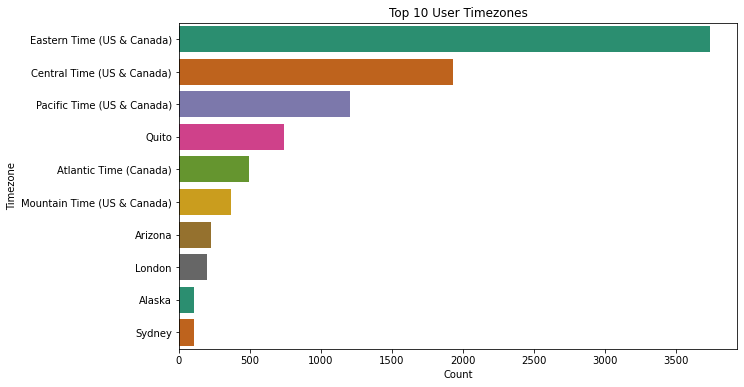

In [26]:
# Top 10 User Timezones
plt.figure(figsize=(10, 6))
top_timezones = df['user_timezone'].value_counts().head(10)
sns.barplot(x=top_timezones.values, y=top_timezones.index, palette="Dark2")
plt.title('Top 10 User Timezones')
plt.xlabel('Count')
plt.ylabel('Timezone')
plt.show()

In [28]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


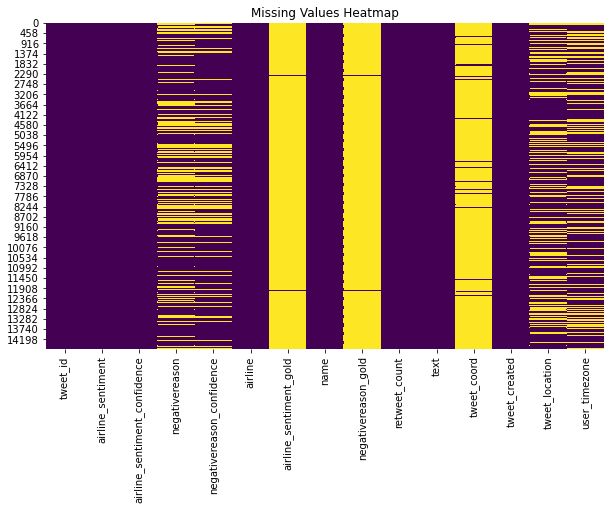

In [29]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [30]:
# Drop columns with too many missing values
df.drop(columns = ['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], inplace=True)

In [31]:
# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
df[['negativereason_confidence']] = imputer.fit_transform(df[['negativereason_confidence']])

In [32]:
# Check if missing values are handled
missing_values_after_imputation = df.isnull().sum()
print("\nMissing Values after Imputation:")
print(missing_values_after_imputation)


Missing Values after Imputation:
tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence          0
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64


In [33]:
# Impute missing values for tweet_location and user_timezone
df['tweet_location'].fillna('Unknown', inplace=True)
df['user_timezone'].fillna('Unknown', inplace=True)

In [34]:
# Convert tweet_created to datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [35]:
# Extract features from tweet_created
df['day_of_week'] = df['tweet_created'].dt.dayofweek
df['month'] = df['tweet_created'].dt.month
df['hour'] = df['tweet_created'].dt.hour

In [36]:
# Normalize numerical features
scaler = MinMaxScaler()
numerical_features = ['airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [37]:
# Model Training
X = df[['airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count', 'day_of_week', 'month', 'hour']]
y = df['airline_sentiment']


In [38]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [40]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Making predict
y_pred = rf_classifier.predict(X_test)

In [42]:
# Example user data
user_data = {
    'airline_sentiment_confidence': 0.8,
    'negativereason_confidence': 0.7,
    'retweet_count': 5,
    'day_of_week': 2,  # Assuming 2 represents Wednesday
    'month': 4,  # Assuming 4 represents April
    'hour': 15  # Assuming 15 represents 3 PM
}

In [43]:
# Convert user data to DataFrame
user_df = pd.DataFrame(user_data, index=[0])

In [44]:
# Preprocess user data
user_df['day_of_week'] = pd.to_numeric(user_df['day_of_week'])
user_df['month'] = pd.to_numeric(user_df['month'])
user_df['hour'] = pd.to_numeric(user_df['hour'])

In [45]:
# Make predictions
user_pred = rf_classifier.predict(user_df[['airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count', 'day_of_week', 'month', 'hour']])
print("Predicted Airline Sentiment:", user_pred[0])

Predicted Airline Sentiment: negative


In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8487021857923497


In [47]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1889
     neutral       0.61      0.68      0.64       580
    positive       0.52      0.44      0.48       459

    accuracy                           0.85      2928
   macro avg       0.71      0.71      0.71      2928
weighted avg       0.85      0.85      0.85      2928



In [48]:
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[1889    0    0]
 [   0  395  185]
 [   1  257  201]]
